In [1]:
using StatsBase
using SpecialMatrices

random_walk1 (generic function with 1 method)

In [74]:
import Base.push!
function push!(X::Matrix, x::Vector)
    ncols = size(X, 2)
    for col=ncols-1 :-1:  1
        X[:, col+1] = X[:, col]
    end
    X[:,1]=x
    X
end

push! (generic function with 28 methods)

In [334]:
function random_walk1!(xs::Matrix)
    step = rand(-1:1,size(xs,1))
    new_x = xs[:,1]+step
    push!(xs,new_x)
end

function lab2_ar_signal!(xs)
    u = randn(size(xs,1))
    new_x = 1.8xs[1]-0.81xs[2]+0.1u
    push!(xs,new_x)
end

lab2_ar_signal! (generic function with 1 method)

In [335]:
n=5000
xs = zeros(1,n)
for _ in 1:n
    lab2_ar_signal!(xs)
end

In [339]:
function yule_walker_fit_AR(xs::Vector, p::Int)
    γ=autocor(xs[:],0:p,demean=true)
    γ_sym = [γ[end:-1:1], γ[2:end]] #Autocovarience is syemtrical about zero
    Γ = Toeplitz(γ_sym[2:end-1])  #Don't use p and -p indexes, in the gamma
    full(Γ)\γ[2:end]
end

yule_walker_fit_AR (generic function with 2 methods)

In [340]:
yule_walker_fit_AR(xs[:], 2)

2-element Array{Float64,1}:
  1.80802 
 -0.817876

In [280]:
A = [2 1; 3 2]
x= [1;2]
y=[4,7]

2-element Array{Int64,1}:
 4
 7

In [284]:
A\y

2-element Array{Float64,1}:
 1.0
 2.0

 - http://cats.lse.ac.uk/homepages/liam/st422/week06-student-notes.pdf
 - Toepiz is at https://github.com/jiahao/SpecialMatrices.jl

In [170]:
using Gadfly

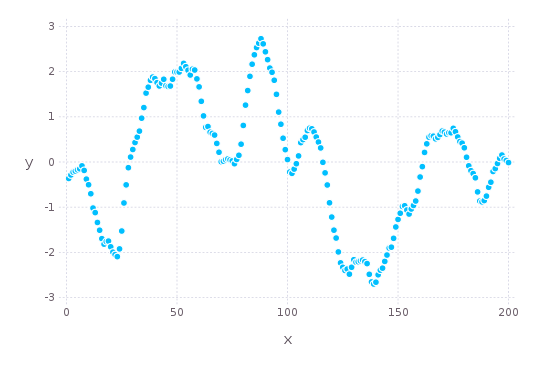

In [175]:
plot(y=xs, x=1:length(xs))